In [ ]:
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns
from scipy import stats
from collections import Counter

In [ ]:
psg = [37, 23, 18, 16, 14, 14, 13, 12, 10, 9]
real = [15, 15, 12, 12, 11, 10, 9, 9, 9, 7]

In [ ]:
df_psg = pd.DataFrame(psg, index=['neymar', 'mbappe', 'thiago_silva', 'cavani', 'marquinhos', 'verratti', 'di_maria', 'navas', 'icardi', 'paredes'])
df_psg.reset_index(inplace = True)
df_psg.columns = ['jogadores', 'salarios']
df_psg

,jogadores,salarios
0,neymar,37
1,mbappe,23
2,thiago_silva,18
3,cavani,16
4,marquinhos,14
5,verratti,14
6,di_maria,13
7,navas,12
8,icardi,10
9,paredes,9


In [ ]:
df_real = pd.DataFrame(real, index=['hazard', 'gareth_bale', 'sergio_ramos', 'tony_kroos', 'luka_modric', 'marcelo', 'benzema', 'james_rodriguez', 'courtois', 'vinicius'])
df_real.reset_index(inplace = True)
df_real.columns = ['jogadores', 'salarios']
df_real

,jogadores,salarios
0,hazard,15
1,gareth_bale,15
2,sergio_ramos,12
3,tony_kroos,12
4,luka_modric,11
5,marcelo,10
6,benzema,9
7,james_rodriguez,9
8,courtois,9
9,vinicius,7


###What is the symmetry of PSG's progress?

In [ ]:
df_psg.skew()

salarios    1.96131
dtype: float64

In [ ]:
#Média, Mediana, Moda
print("Média aritmética:", st.mean(df_psg.salarios))
print("Mediana:", st.median(df_psg.salarios))
print("Moda:", Counter(df_psg.salarios))

Média aritmética: 16.6
Mediana: 14.0
Moda: Counter({14: 2, 37: 1, 23: 1, 18: 1, 16: 1, 13: 1, 12: 1, 10: 1, 9: 1})


mean > median = mode

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


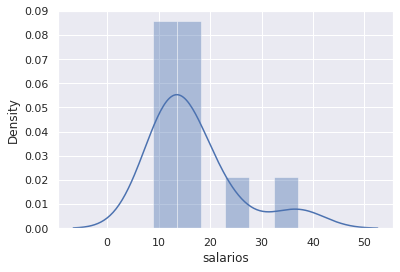

In [ ]:
sns.set(rc = {'figure.facecolor': 'w'})
sns.distplot(df_psg.salarios);

R = Positive Asymmetric.

###Which alternative is correct based on the calculation of the mean, median and mode of the Real team's salaries?

In [ ]:
#Média, Mediana, Moda
print("Média aritmética:", st.mean(df_real.salarios))
print("Mediana:", st.median(df_real.salarios))
print("Moda:", Counter(df_real.salarios))

Média aritmética: 10.9
Mediana: 10.5
Moda: Counter({9: 3, 15: 2, 12: 2, 11: 1, 10: 1, 7: 1})


mean > median > mode

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


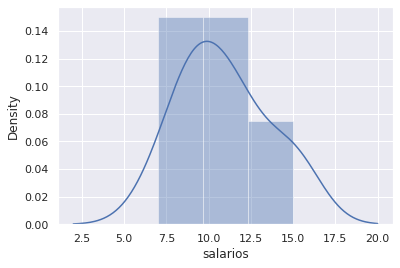

In [ ]:
sns.distplot(df_real.salarios);

R = The mode is smaller than the median and the median is smaller than the mean.

###Regarding the variability of salaries between the two teams, we can conclude that:

In [ ]:
# Desvio-padrão
print("Desvio-padrão amostral PSG:", st.stdev(df_psg.salarios))
print("Desvio-padrão amostral Real:", st.stdev(df_real.salarios))

Desvio-padrão amostral PSG: 8.221921916437786
Desvio-padrão amostral Real: 2.64365067451978


standard deviation_psg > standard deviation_real

In [ ]:
print("Média aritmética PSG:", st.mean(df_psg.salarios))
print("Média aritmética Real:", st.mean(df_real.salarios))

Média aritmética PSG: 16.6
Média aritmética Real: 10.9


mean_psg > mean_real

In [ ]:
# Coefficient of Variation
def cv(n):
  num = 100*st.stdev(n)/st.mean(n)
  return round(num,2)

In [ ]:
print("CV(%) PSG:", cv(df_psg.salarios))
print("CV(%) Real:", cv(df_real.salarios))

CV(%) PSG: 49.53
CV(%) Real: 24.25


cv_psg > cv_real

R = Both the mean and the coefficient of variation are lower in the Real team.

###What is the inter-quartile range of the Real team?

In [ ]:
quartis_real = np.quantile(df_real.salarios, [0, 0.25, 0.5, 0.75, 1])
quartis_real

array([ 7. ,  9. , 10.5, 12. , 15. ])

In [ ]:
q1 = quartis_real[1]
q3 = quartis_real[3]
amp_int = (q3 - q1)
print("Amplitude inter-quartis Real:", amp_int)

Amplitude inter-quartis Real: 3.0


R = 3.

###In which salary distribution(s) can we consider the occurrence of outliers?

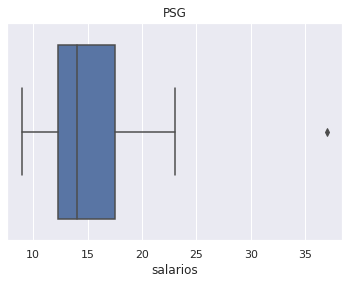

In [ ]:
# Boxplot PSG
sns.boxplot(x = df_psg.salarios).set_title('PSG');

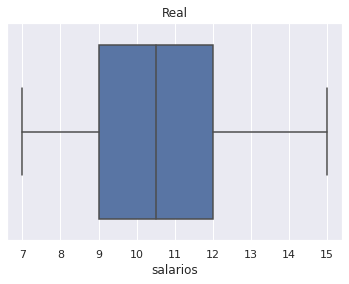

In [ ]:
# Boxplot Real
sns.boxplot(x = df_real.salarios).set_title('Real');

R = PSG.

###The following data shows Real's performance in the last championship. The first value is the number of goals and the second the frequency: X={(0.5), (1.3), (2.4), (3.3), (4.2), (5.2), (7.1)}. If X, Y and Z are, respectively, the mean, median and mode of this distribution, then:

In [ ]:
desemp_real = [0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 5, 5, 7]

In [ ]:
#Mean, Median, Mode
print("Média aritmética:", st.mean(desemp_real))
print("Mediana:", st.median(desemp_real))
print("Moda:", Counter(desemp_real))

Média aritmética: 2.25
Mediana: 2.0
Moda: Counter({0: 5, 2: 4, 1: 3, 3: 3, 4: 2, 5: 2, 7: 1})


mean > median > mode

R = Z < Y < X.